# Análisis Exploratorio de Datos (EDA)

## Importación módulos y dataset

In [ ]:
#Upgrade matplotlib (Por defecto se intala la versión 3.2.2, necesito una función que se implementó desde la versión 3.4 en adelante.)
!pip install matplotlib --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Instalación de adjusText para que no se superpongan los textos de los modelos en el scatterplot.
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=b5a4fc3e876cecaddd1f69809cb757525cd2df1f0d51fd8779f069b003615afa
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
#Importación módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Importación dataset desde github 
#Obtenido de Kaggle https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
url='https://raw.githubusercontent.com/neoncoip/practice/main/Telco_customer_churn.csv'
telco = pd.read_csv(url, sep=';')
pd.options.display.max_columns = None
display(telco.head())

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"99,65","820,5",Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,"104,8","3046,05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",Yes,1,89,5340,Competitor had better devices


## Inspección del dataset

In [ ]:
#Inspección del dataset
display(telco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Count              7043 non-null   int64 
 2   Country            7043 non-null   object
 3   State              7043 non-null   object
 4   City               7043 non-null   object
 5   Zip Code           7043 non-null   int64 
 6   Lat Long           7043 non-null   object
 7   Latitude           7043 non-null   object
 8   Longitude          7043 non-null   object
 9   Gender             7043 non-null   object
 10  Senior Citizen     7043 non-null   object
 11  Partner            7043 non-null   object
 12  Dependents         7043 non-null   object
 13  Tenure Months      7043 non-null   int64 
 14  Phone Service      7043 non-null   object
 15  Multiple Lines     7043 non-null   object
 16  Internet Service   7043 non-null   object


None

In [ ]:
telco['Churn Value'].groupby(by=pd.isnull(telco['Churn Reason'])).sum()

Churn Reason
False    1869
True        0
Name: Churn Value, dtype: int64

>* Tenemos 33 campos, de los cuales 10 son númericos aunque 4 de ellos son reconocidos como object ('Latitude', 'Longitude', 'Monthly Charges' y 'Total Charges').<br>
>* Un sólo campo tiene datos nulos: 'Churn Reason'.
 --- 

### Corregimos formato columnas numéricas que fueron importadas como texto.

In [ ]:
#Definimos una lista con las columnas a convertir a número
col_conv = ['Longitude', 'Latitude', 'Monthly Charges', 'Total Charges']

#Reemplazamos la coma por punto y el espacio por nada y convertimos a número
telco[col_conv] = telco[col_conv].apply(lambda x: x.str.replace(',', '.')).apply(lambda x: x.str.replace(' ', '0')).apply(lambda x: pd.to_numeric(x))
print(telco[col_conv].info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        7043 non-null   float64
 1   Latitude         7043 non-null   float64
 2   Monthly Charges  7043 non-null   float64
 3   Total Charges    7043 non-null   float64
dtypes: float64(4)
memory usage: 220.2 KB
None


### Evaluamos nulos

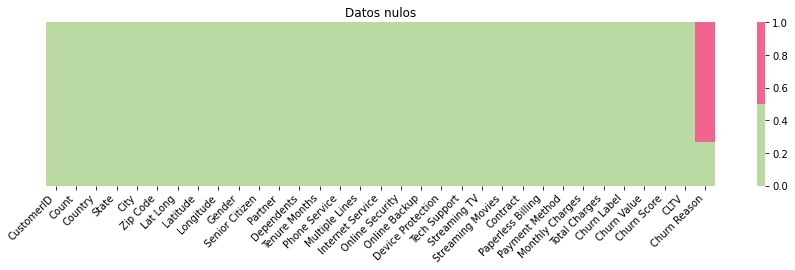

In [ ]:
plt.figure(figsize=(15,3))
nulos = sns.heatmap(telco.sort_values(by=['Churn Value']).isna(), cmap=(['#bbd9a3','#f2638e']))
nulos.set_title('Datos nulos')
nulos.tick_params(left=False, labelleft=False)
plt.xticks(rotation=45, horizontalalignment='right')
nulos.set_ylabel(None)
plt.show()

>* Verificamos, como era de suponer, que el campo "Churn Reason" es nulo en los casos sin churn.
 --- 

## Comprendiendo los campos

### Definición:

Obtenido de: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

*   **CustomerID:** A unique ID that identifies each customer.
*   **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
*   **Country:** The country of the customer’s primary residence.
*   **State:** The state of the customer’s primary residence.
*   **City:** The city of the customer’s primary residence.
*   **Zip Code:** The zip code of the customer’s primary residence.
*   **Lat Long:** The combined latitude and longitude of the customer’s primary residence.
*   **Latitude:** The latitude of the customer’s primary residence.
*   **Longitude**: The longitude of the customer’s primary residence
*   **Gender:** The customer’s gender: Male, Female
*   **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No.
*   **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
*   **Tenure Months:** Indicates the total amount of months that the customer has been with the company.
*   **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No.
*   **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.
*   **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
*   **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.
*   **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.
*   **Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.
*   **Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.
*   **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
*   **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
*   **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No.
*   **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
*   **Monthly Charges:** Indicates the customer’s current total monthly charge for all their services from the company.
*   **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
*   **Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
*   **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
*   **Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
*   **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
*   **Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

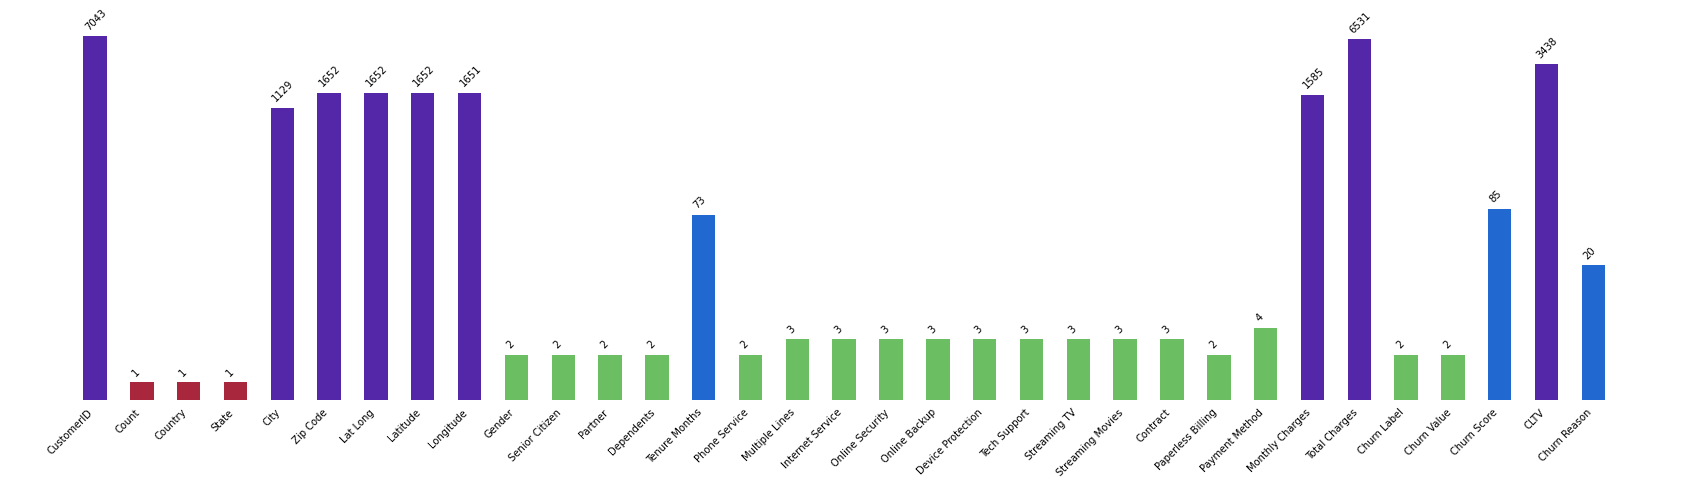

In [ ]:
#Contruimos una lista que cuente los valóres únicos para cada campo
val_unicos = []
for col in telco.columns:
  val_unicos.append(telco[col].nunique())
  
#Definimos colores y rangos para destacar el gráfico que vamos a construir con los datos del paso anterior
colores = ['#a8273c', '#6bbf62', '#2168d1', '#5427a8']
niveles = [1, 4, 100]
color_profile = [{i<=niveles[0]:colores[0], niveles[0]<i<=niveles[1]:colores[1], niveles[1]<i<=niveles[2]:colores[2], niveles[2]<i:colores[3]}[True] for i in val_unicos]      

#Graficamos
fig, ax = plt.subplots(figsize=(30, 7))
bars = ax.bar(telco.columns, val_unicos, width=.5, color=color_profile)

#Etiquetamos las barras con los valores (A la usanza de Matplotlib <3.4), limpiamos y ajustamos gráfico.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), 1.2*yval, yval, rotation=45)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')
ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=True)
sns.despine(fig=fig, ax=ax, top=True, right=True, left=True, bottom=True)
plt.minorticks_off()
plt.show()

#### Conclusiones preliminares 

>**CustomerID:** pareciera no ser un campo de utilidad pero veremos si existe algún patrón en los números y letras que sirvan para el modelo predictivo.<br>
>**Count:** este campo lo eliminaremos ya que es uniforme y no aporta información.<br>
>**Country:** presenta un único valor "United States", lo eliminaremos en la creación del modelo predictivo.<br>
>**State:** presenta un único valor "California", lo eliminaremos en la creación del modelo predictivo.<br>
>**Lat Long:** Contiene información redundante de 'Latitude' y 'Longitude', lo eliminaremos en la creación del modelo predictivo.<br>
>**Total Charges:** Este campo podría ser redunte con 'Tenure Months' y 'Monthly Charges'. Haremos un análisis dedicado.<br> 
>**Churn Label:** Redundante con 'Churn Value', lo eliminaremos para el modelo predictivo.<br>
>**Churn Score:** No lo usaremos en el modelo predictivo.<br>
>**CLTV:** No lo usaremos en el modelo predictivo.<br>
>**Churn Reason:** Inmediatamente ofrecerá insights para cuantificar y ponderar los motivos.

---

In [ ]:
#Veamos algunas estadísticas de los campos numéricos.
display(telco.describe())

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


#### Más conclusiones preliminares:

>*   El 27% de los registros tiene churn positivo.
>*   Ya habíamos advertido que 'Count' sólo tiene el mismo valor para todos los registros.
>*   Los valores de 'Tenure Months' prensentan una media y mediana similares y los valores min y max son razonables, ninguna alarma para este campo.

---






## Análisis univariado

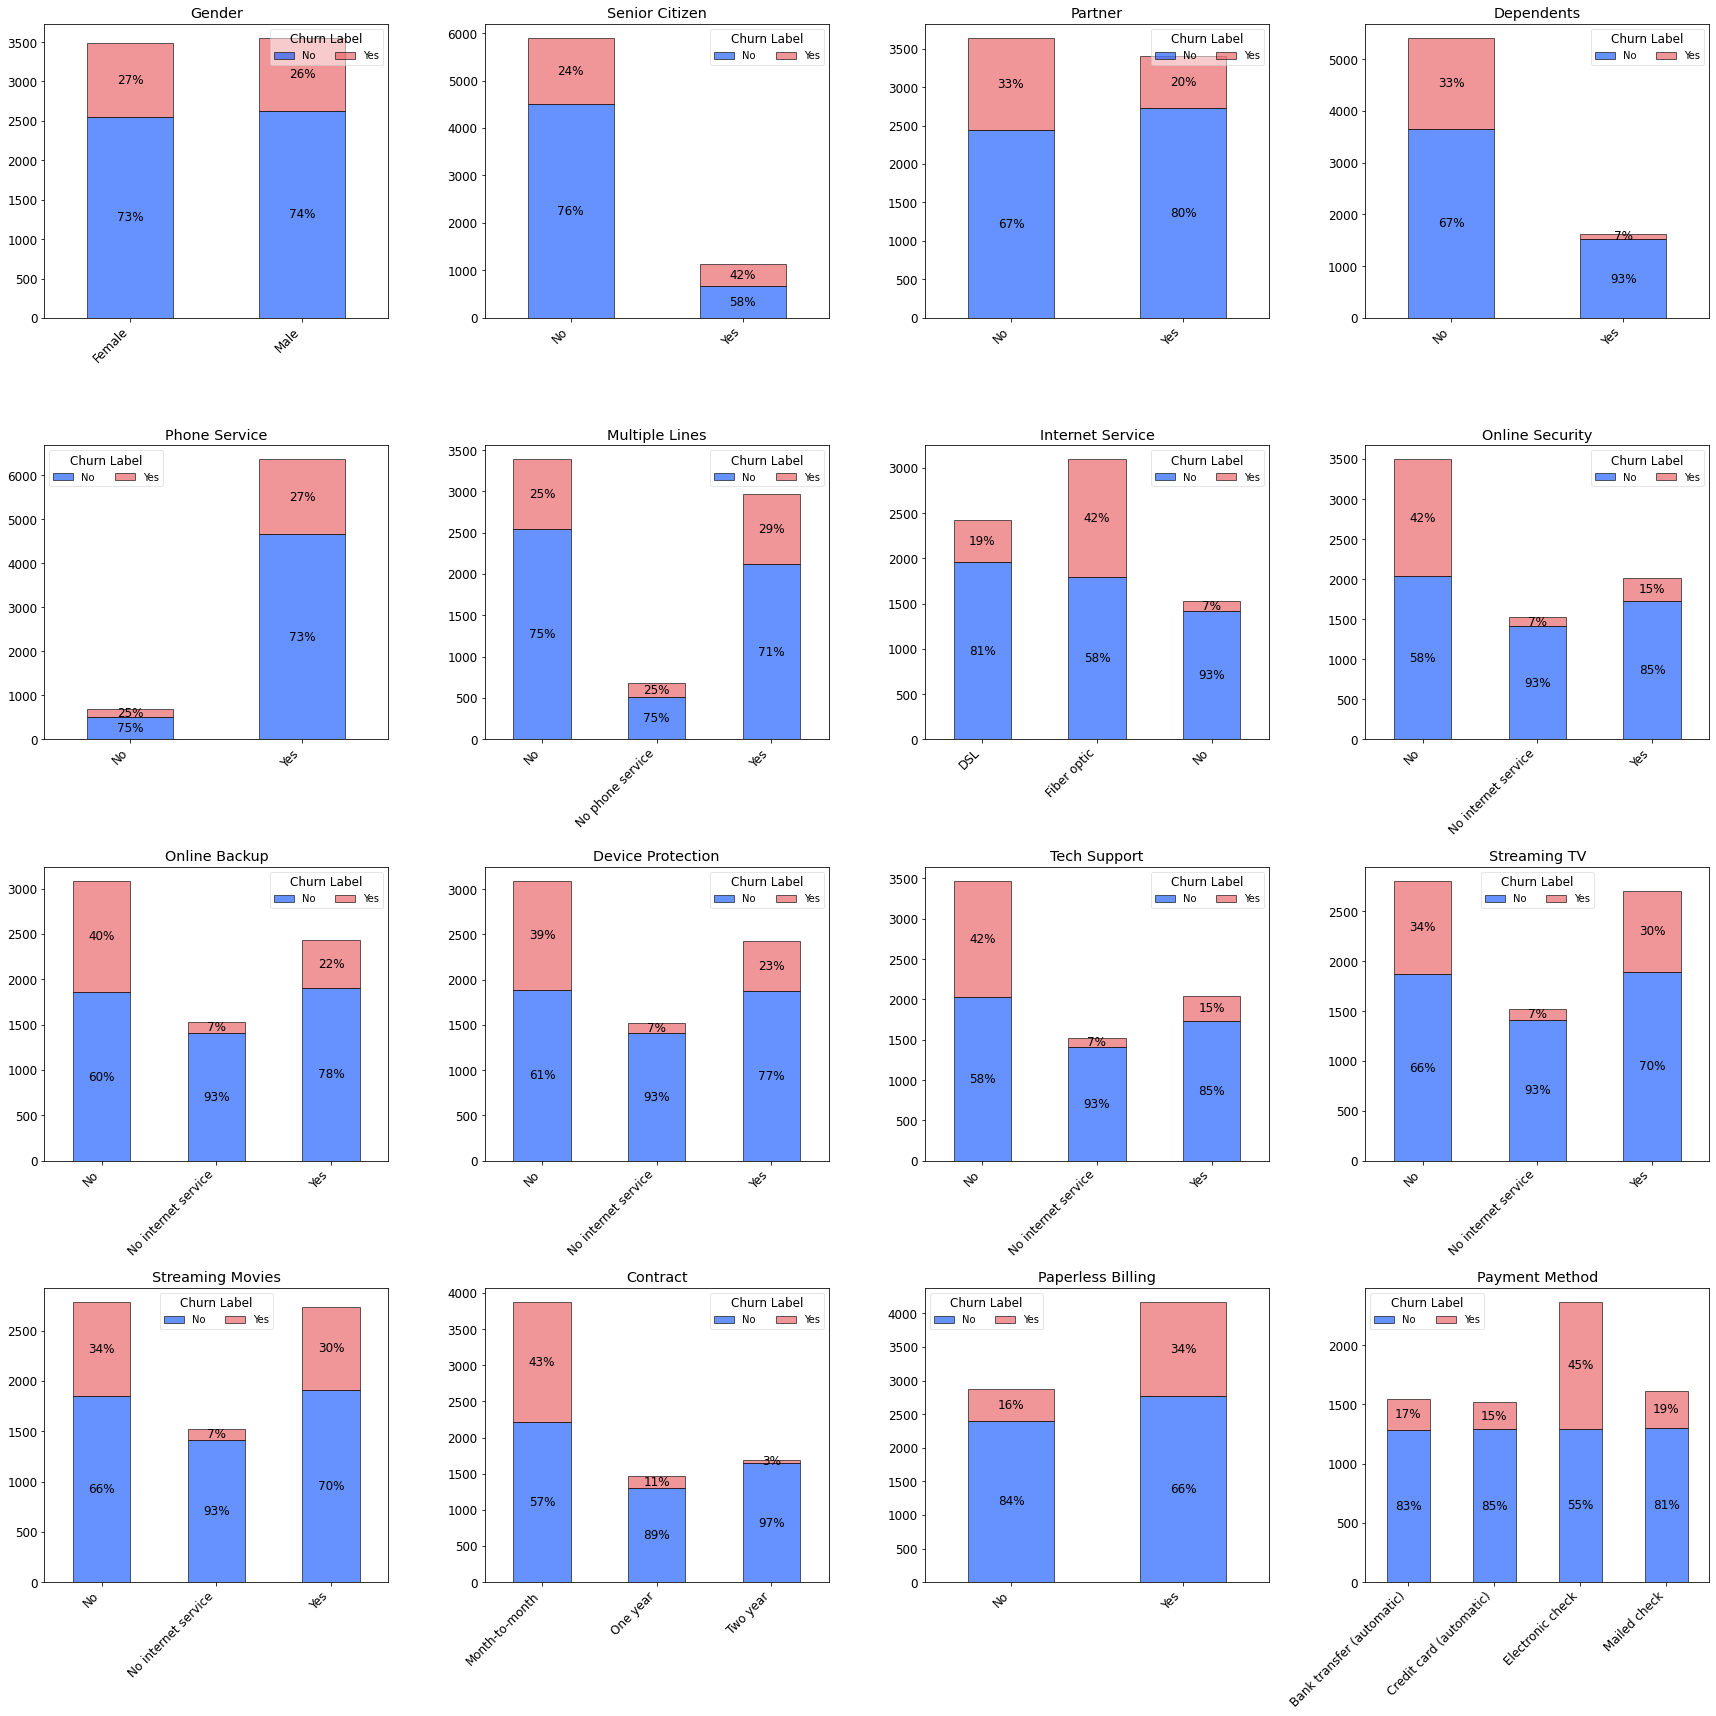

In [ ]:
#Seteamos los criterios para las columnas que queremos graficar. Las columnas que tengan que cantidad de valores únicos queremos seleccionar?
min_unicos = 2
max_unicos = 4

#Creamos una lista con las columnas que cumplen el criterio min y max.
col_selec = []
for col in telco.columns:
  if telco[col].nunique() >= min_unicos and telco[col].nunique() <= max_unicos and col not in ['Churn Value', 'Churn Label']:
    col_selec.append(col)

#Definimos la cantidad de columnas en las que queremos ver los gráficos
num_col = 4

#Definimos paleta personalizada
azul='#0049ff'
rojo='#e64e53'
pal2=[azul, rojo]

#Graficamos las columnas antes seleccionadas diferenciando por 'Churn label'
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(-(-len(col_selec)//num_col), num_col, figsize=(24,24))
i=0
j=0
for col in col_selec:
  #Calculando los valores para cada variable
  q_churn_cat = telco[['Churn Label', col]].value_counts().unstack(0) #Cantidad de churn y no churn para cada valor de cada columna.
  
  #Calculando los porcentajes de churn para cada categoría (en cada variable)
  q_churn_cat_T = telco[['Churn Label', col]].value_counts().unstack(1) #Es lo mismo que q_churn_cat pero traspuesto, sino no funciona por nulos.
  q_churn_cat_T_percentage = q_churn_cat_T/q_churn_cat_T.sum(axis=0)
  labels_array = q_churn_cat_T_percentage.to_numpy() #Array de matrices de procentajes de churn (etiquetas de las barras).
 
  
  #Graficamos
  q_churn_cat.plot(kind='bar', stacked=True, title=col, ax=ax[i,j], color=pal2, alpha=0.6, edgecolor='k')
  
  #Colocamos etiquetas de porcentajes
  for n, bar in enumerate(ax[i,j].containers):
    labels = []
    for m in range(q_churn_cat.shape[0]):
      labels.append(f"{round(100*labels_array[n][m])}%")
    ax[i,j].bar_label(bar, labels=labels, label_type='center')
    ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=45, horizontalalignment='right')
    ax[i,j].set_xlabel(None)
    legend = ax[i,j].legend(title='Churn Label', fontsize='small', frameon=True, loc='best', ncol = 2, columnspacing=2, framealpha=0.5)
    #frame = legend.get_frame() #Estas 2 líneas sirven para luego de haber asignado a legend la leyenda poder manejar el frame que la contiene.
    #frame.set_edgecolor('k')
        
  #Incrementamos las coordenadas de posición en la grilla
  if j==num_col-1:
    j = 0
    i += 1
  else:
    j += 1
    
#Ploteemos de manera tal que las leyendas no se superpongan con otro gráficos de la grilla
plt.tight_layout()
plt.show() 

#### Conclusiones

>**Senior Citizen:** Un quinto de los clientes son jubilados y tiene un 42% de churn.<br>
>**Partner:** Vivir con otras personas (no a cargo) genera un propensión al churn un 50% mayor que los que viven solos o con gente a cargo solamente.<br>
>**Dependents:** Sólo un tercio vive con gente a cargo y tienen un churn de apenas 7%, 1 de cada de 3 personas que no tiene gente a cargo deja la compañía.<br>
>**Phone Service:** Apenas un 15% de los clientes no tiene teléfono, no influye sustancialmente en el churn.<br>
>**Gender:** no afecta el comportamiento del churn.<br>
>**Internet Service:** El 80% de los clientes tiene servicio de internet, más de la mitad de esos fibra óptica y tiene un churn de 42%, más del doble de los que tienen ADSL.<br>
**Online Security:** De los clientes que tienen internet, el 60% no tiene este servicio y tienen un churn de 42%, casi el triple que los que sí lo tienen.

### Análisis Tenure Months

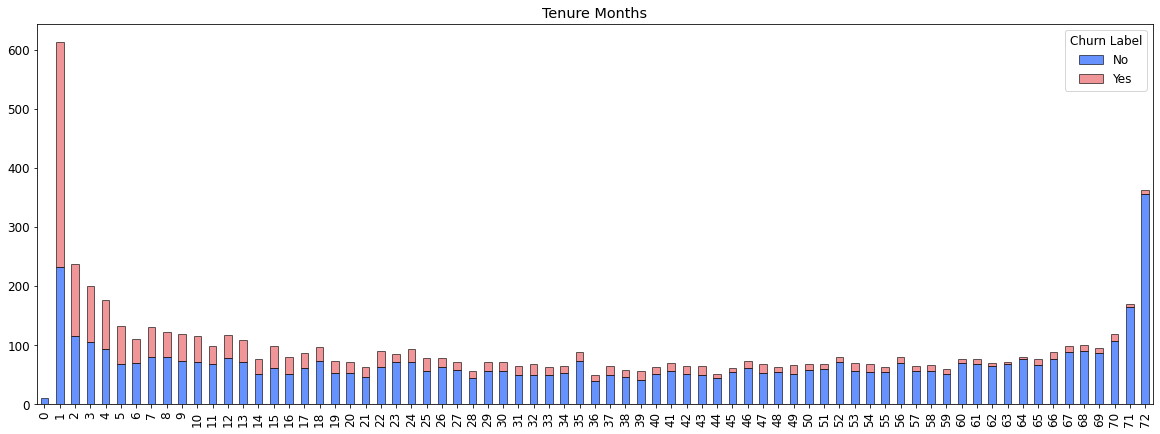

In [ ]:
ax = telco[['Churn Label', 'Tenure Months']].value_counts().unstack(0).plot(kind='bar', figsize=(20,7), stacked=True, title='Tenure Months', color=pal2, alpha=0.6, edgecolor='k')
ax.set_xlabel(None)
plt.show()

In [ ]:
#Calculamos churn y porcentaje para un grupo específico de meses en la compañía
exact = 1
churn = round(telco[telco['Tenure Months']==exact]['Churn Value'].mean(), 2)
participacion = round(telco[telco['Tenure Months']==exact].shape[0]/telco.shape[0], 2)
print(f'El {round(participacion*100)}% de los clientes tiene {exact} mes/es de antiguedad y un {round(churn*100)}% de churn.')

El 9% de los clientes tiene 1 mes/es de antiguedad y un 62% de churn.


In [ ]:
#Calculamos churn y porcentaje para un grupo de hasta x meses en la compañía
menoroigual = 5
churn = round(telco[telco['Tenure Months']<=menoroigual]['Churn Value'].mean(), 2)
participacion = round(telco[telco['Tenure Months']<=menoroigual].shape[0]/telco.shape[0], 2)
print(f'El {round(participacion*100)}% de los clientes tiene {menoroigual} o menos meses de antiguedad y un {round(churn*100)}% de churn.')

El 19% de los clientes tiene 5 o menos meses de antiguedad y un 54% de churn.


### Análisis Monthly Charges y Total Charges

In [ ]:
#Definimos una función para graficar barras apiladas, en una escala absoluta, pero con las etiquetas de los valores relativos de churn y no churn.
def customhist(col, num_bins):
  
  #Definimos ancho de columna dinámico para que la apariencia sea similar sin importar la escala de x
  width = (max(telco[col])-min(telco[col]))/ (2*num_bins)
  
  #Seleccionamos los registros de la columna input según el valor de churn
  val = telco[col]
  val_yes = telco[telco['Churn Value']==1][col]
  val_no = telco[telco['Churn Value']==0][col]

  #Generamos los valores de los bins
  bins = np.linspace(min(val), np.percentile(val, 100-100/num_bins), num_bins)

  #Asignamos los valores a cada bin
  digitized_yes = np.digitize(val_yes, bins)
  digitized_no = np.digitize(val_no, bins)
  
  #Creamos figura
  fig, ax = plt.subplots(figsize=(12,6))
  
  #Inicializamos listas para contar elementos en cada bin
  q_digitized_yes = []
  q_digitized_no = []

  #Contamos elementos en cada bin
  for i in range(num_bins):
    q_bin_yes = np.count_nonzero(digitized_yes == i+1)
    q_bin_no = np.count_nonzero(digitized_no == i+1)
    q_digitized_yes.append(q_bin_yes)
    q_digitized_no.append(q_bin_no)

  #Calculamos total (por barra) y los porcentajes
  q_bin = np.add(q_digitized_yes, q_digitized_no)
  q_digitized_yes_per = np.divide(q_digitized_yes, q_bin)
  q_digitized_no_per = np.divide(q_digitized_no, q_bin)

  #Redondeamos valores de etiquetas
  xlabels = [round(x) for x in bins]

  #Graficamos barras inferiores y superiores
  bar_no = ax.bar(x=bins, height=q_digitized_no, width=width, color=azul, alpha=0.6, edgecolor='k')
  bar_yes = ax.bar(x=bins, height=q_digitized_yes, bottom=q_digitized_no, width=width, tick_label=xlabels, color=rojo, alpha=0.6, edgecolor='k')

  #Inicializamos lista de etiquetas de porcentajes  
  label_y = []
  label_n = []

  #Calculamos etiquetas de arriba (churn=Yes)
  for i in q_digitized_yes_per:
    lab_y = f"{round(100*i)}%"
    label_y.append(lab_y)

  #Calculamos etiquetas de abajo (churn=No)
  for i in q_digitized_no_per:
    lab_n = f"{round(100*i)}%"
    label_n.append(lab_n)

  #Colocamos etiquetas, seteamos títulos y graficamos
  ax.bar_label(bar_yes, labels=label_y, label_type='center')
  ax.bar_label(bar_no, labels=label_n, label_type='center')
  plt.title(col)
  plt.show()

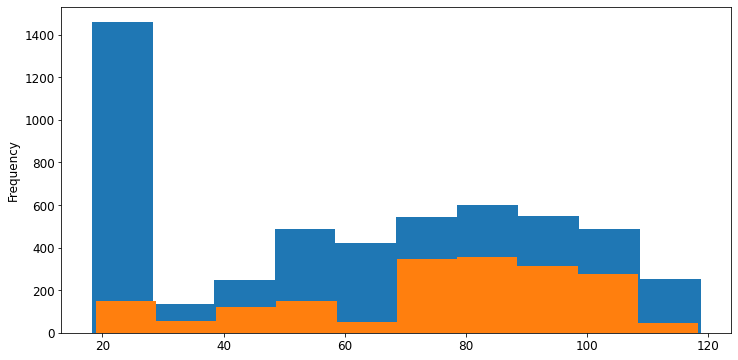

In [ ]:
#Esta sería la versión "inmediata" del gráfico que construí, lo incluí sólo para entender porqué invertí "bastante" código en eso
mc = telco.groupby('Churn Value')['Monthly Charges'].plot(kind='hist', figsize=(12,6))
plt.show()

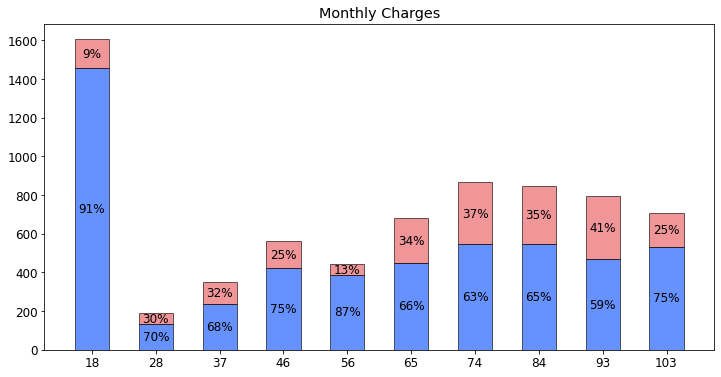

In [ ]:
customhist('Monthly Charges', 10)

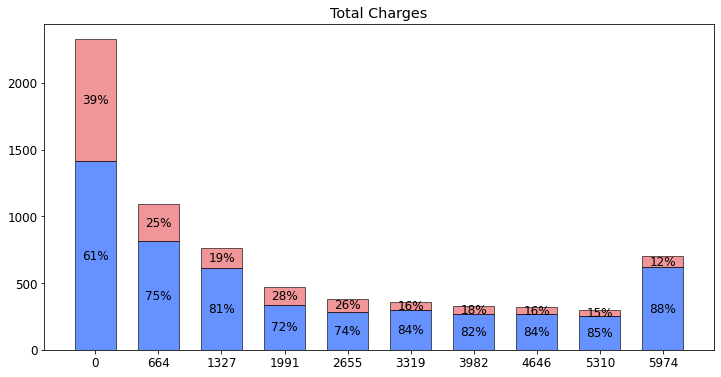

In [ ]:
customhist('Total Charges', 10)

> Total charges pareciera que tiene el mismo comportamiento que tenure months, los comparamos:

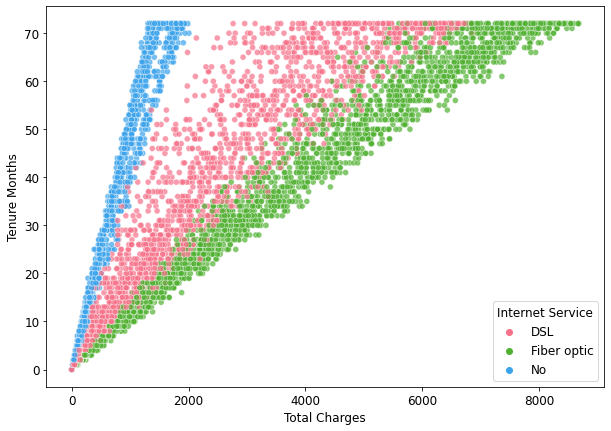

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=telco, x='Total Charges', y='Tenure Months', hue='Internet Service', palette='husl', alpha=0.7)
plt.show()

#### Conclusiones

> Existe una relación prácticamente lineal entre 'Total Charges' y 'Tenure Months'. Encontramos 3 zonas que se corresponden con la tecnología del "Internet Service".

---

### Análisis Churn Reason

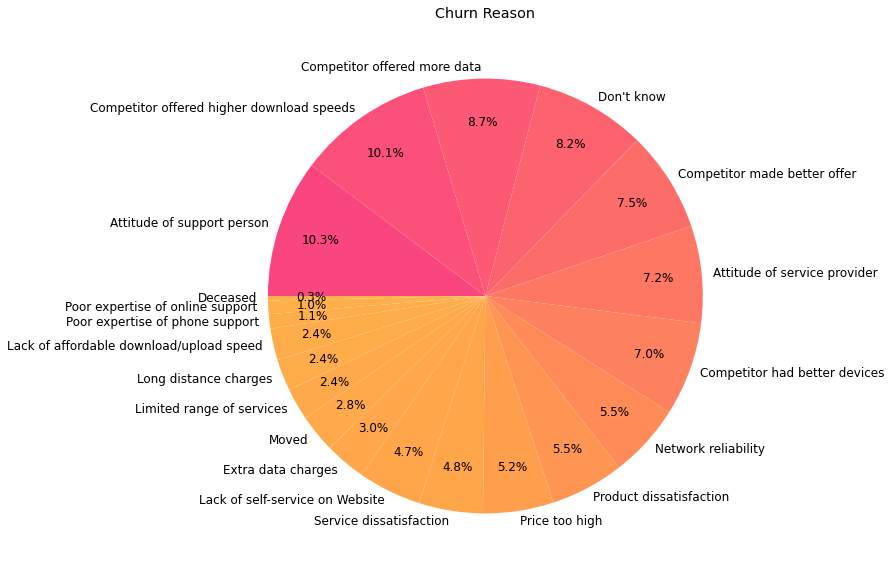

In [ ]:
#Definimos paleta personalizada
colors = sns.color_palette('blend:#fa467f,#ffa44a,#ffb14b', 20)

#Graficamos torta
telco['Churn Reason'].value_counts().plot(kind='pie', figsize=(10,10), colors=colors, autopct='%1.1f%%', labeldistance=1.05, pctdistance=0.8, counterclock=False, startangle=-180)
plt.title('Churn Reason')
plt.ylabel(None)
plt.show()

In [ ]:
#Contamos que porcentaje de razones están vinculadas a motivo "Competidor"
print(round(telco['Churn Reason'].str.contains('Competitor').value_counts(normalize=True)[True], 2)) #Competitor reason


0.33


In [ ]:
#Contamos que porcentaje de razones están vinculadas a motivo "Soporte/Actitud"
print(round(telco['Churn Reason'].str.contains('support|Attitude').value_counts(normalize=True)[True], 2)) #Support or Attitude reason

0.2


#### Conclusiones

> La mitad de los motivos se engloban dentro de los tópicos: "Competidor" con el 33% del total (El competidor ofrece mejor servicio u oferta) y por otro lado la "Atención": el Soporte y Actitud brindados acumulan el 20% de los casos.

---

## Análisis complementarios

### Columnas "Churn Score" y "CLTV"

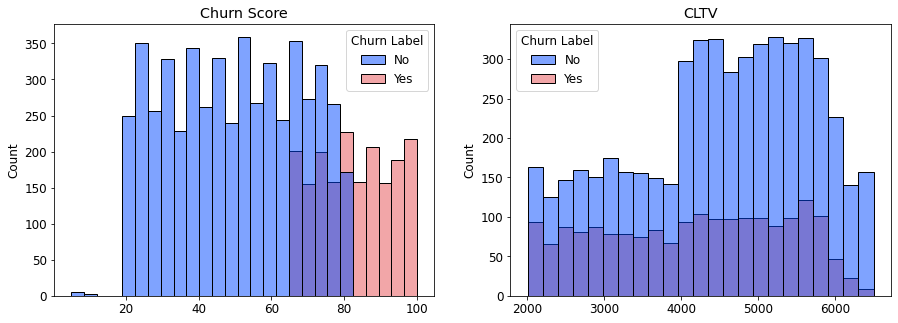

In [ ]:
#Graficamos respectivos histogramas
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(ax=ax[0], data=telco, x='Churn Score', hue='Churn Label', hue_order=['No', 'Yes'], palette=pal2)
sns.histplot(ax=ax[1], data=telco, x='CLTV', hue='Churn Label', hue_order=['No', 'Yes'], palette=pal2)
ax[0].set_title('Churn Score')
ax[0].set_xlabel(None)
ax[1].set_title('CLTV')
ax[1].set_xlabel(None)
plt.show()

In [ ]:
#Calculamos cuantos casos corresponden a personas que dieron la baja por deceso y cuantas por mudanza.
telco[telco['Churn Reason']=='Deceased'].shape[0], telco[telco['Churn Reason']=='Moved'].shape[0]

(6, 53)

#### Conclusiones Churn Score y CLTV

>* EL Churn Score se distribuye llamativamente de manera uniforme para ambas etiquetas. Sorpresivamente todos los casos de churn por mudanza (6) y deceso (53) tienen un score mayor a 65. 
>* CLTV: para los clientes con churn la distribución es mayormente uniforme y en clientes que permanecen en la empresa existen 2 zonas de distribución uniforme, siendo la de rango superior (4000-6000) del doble de volumen que el resto.
---






### Buscando patrones en customer ID

In [ ]:
#Creamos un dataframe auxiliar para inspeccionar
num_let = pd.DataFrame()
num_let[['CustomerID_num', 'CustomerID_let']] = telco['CustomerID'].str.split('-', 1, expand=True)
num_let['Churn Value']=telco['Churn Value']
num_let.head()

,CustomerID_num,CustomerID_let,Churn Value
0,3668,QPYBK,1
1,9237,HQITU,1
2,9305,CDSKC,1
3,7892,POOKP,1
4,0280,XJGEX,1


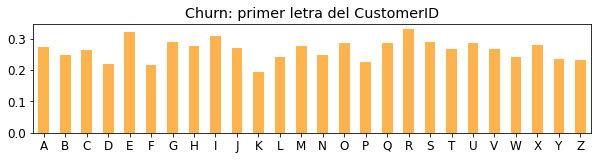

In [ ]:
#Buscamos patrones con la primer letra
num_let['CustomerID_let_first'] = num_let['CustomerID_let'].astype(str).str[0]
ax = num_let.groupby(['CustomerID_let_first']).mean().plot(kind='bar', figsize=(10,2), color=(1,0.7,0.3), title='Churn: primer letra del CustomerID')
ax.set_xlabel(None)
ax.get_legend().remove()
plt.xticks(rotation=0)
plt.show()

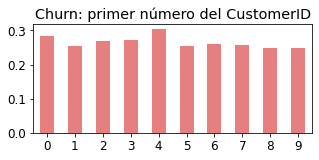

In [ ]:
#Buscamos patrones con el primer número
num_let['CustomerID_num_first'] = num_let['CustomerID_num'].astype(str).str[0]
ax = num_let.groupby(['CustomerID_num_first']).mean().plot(kind='bar', figsize=(5,2), color=(0.9,0.5,0.5), title='Churn: primer número del CustomerID')
ax.set_xlabel(None)
ax.get_legend().remove()
plt.xticks(rotation=0)
plt.show()

#### Conclusiones Customer ID

>No detectamos patrones en el CustomerID, eliminaremos esta columna del input del modelo.

---

### Datos geográficos

In [ ]:
#Agrupamos los datos por ciudad, promediando latitud y longitud y contando la cantidad de clientes
cities = telco.groupby(by='City').agg(Lon_mean=('Longitude', np.mean), Lat_mean=('Latitude', np.mean), Chu_mean=('Churn Value', np.mean), Count=('Longitude', np.count_nonzero))

#Definimos umbral para seleccionar ciudades con más de x clientes y filtramos los datos previamente agrupados
threshold = 20
cithresh = cities[cities['Count']>threshold]

#Graficamos
fig = px.scatter_mapbox(cithresh, lat="Lat_mean", lon="Lon_mean", color='Chu_mean', color_continuous_scale="Jet", size='Count', size_max=30, zoom=10, mapbox_style="carto-positron", opacity=1, height=700)
fig.update_layout(margin=dict(l=20, r=20, t=40, b=40), mapbox={'zoom': 4.5})
fig.show()

#### Conclusiones datos geográficos

>Si nos quedamos con la localidades de más de 20 clientes (ejemplo) encontramos:<br> 
>* Santa Rosa y Modesto son 2 de la localidades más críticas en materia de churn: 46% y 43% respectivamente, pero entre ambas totalizan apenas 52 clientes. A la vez, más al sur encontramos a San Diego, donde tenemos más de 150 clientes y el churn en 33%, 6 puntos por encima de la media. <br> 
>* Destaca positivamente por su churn de 8%, Bakersfield, con 40 clientes.
> 
 --- 